Transformation Tasks
- Identifying and handling duplicated data
- Identifying and handling missing values

In [1]:
# libraries we need for today

import pandas as pd


In [2]:
# read the data

users_data = pd.read_pickle("../data/users_data_final.pkl")
users_data.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [53]:
type(users_data)

pandas.core.frame.DataFrame

In [3]:
# summary of the data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-null 

In [4]:
# number of numerical variables
print("# of numerical variables:",
      len(users_data.select_dtypes(['float64', 'int64', 'bool']).columns))


# of numerical variables: 11


In [5]:
# number of variables with data type object

print("# of variables with data type object:",
      len(users_data.select_dtypes(['object']).columns))


# of variables with data type object: 7


### Identifying and Removing duplicate rows

In [6]:
# Code to identify duplicated rows of data

users_data[users_data.duplicated()]

# empty data frame, so currently there is no duplicated data

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device


In [7]:
users_data.duplicated().sum()

0

### Identifying and Handling Missing Data

In [8]:
# lets take this code up a level

users_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [9]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "variable_name",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "variable_name",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "variable_name") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df[missing_value_df.percent_missing > 0]

In [10]:
# the function gives all variables with missing values , the data type and how much data is missing 

missing_df = identify_missing_data(users_data)
missing_df

,variable_name,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object
7,date_joined,0.07,datetime64[ns]


In [11]:
print("# of variables with missing values", len(missing_df.variable_name))

# of variables with missing values 8


In [12]:
# number of variables with more than 70% missing data

print("number of variables with more than 70% missing data:",
      len(missing_df[missing_df.percent_missing > 70].variable_name))


number of variables with more than 70% missing data: 1


In [13]:
print("# of numerical variables with missing values:", 
      len(missing_df[(missing_df.data_type == "float64") | 
         (missing_df.data_type == "int64")].variable_name))


# of numerical variables with missing values: 2


In [14]:
print("# of non numerical variables with missing values:", 
      len(missing_df[(missing_df.data_type == "object") | 
         (missing_df.data_type == "datetime64[ns]")].variable_name))


# of non numerical variables with missing values: 6


In [15]:
# identify columns that have more than 70% missing data
threshold = 70

cols_to_drop = list(missing_df[missing_df.percent_missing > threshold].variable_name)
cols_to_drop

['poutcome']

In [16]:
# transformation task: drop columns that have more than 70% missing data
users_data_cleaned = users_data.drop(cols_to_drop, axis=1)

In [17]:
# check what else needs handling or dropping
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,variable_name,percent_missing,data_type
0,contact,28.80,object
1,total_amount_usd,22.12,float64
2,number_transactions,22.12,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object
6,date_joined,0.07,datetime64[ns]


In [18]:
# identify rows of data where date joined is null

users_data_cleaned[users_data_cleaned.date_joined.isnull()]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
1832,a8efc367-e7bc-4ddf-a075-ab6a850c5be1,2.0,10.0,40,blue-collar,married,secondary,False,True,False,None,1692,2,-1,0,True,NaT,desktop
1970,e287579c-0eb5-4da0-a697-a92e6a024c47,6.0,391.0,34,admin.,single,secondary,False,True,False,None,192,2,-1,0,False,NaT,mobile
8033,9e6d7f37-fec1-4967-9281-d37eb69fc211,4.0,691.0,34,technician,married,tertiary,False,True,True,None,70,1,-1,0,False,NaT,mobile
11292,e380ff78-00d5-4f4d-93a3-db991ff0ca3b,3.0,2769.0,41,services,divorced,secondary,False,True,False,None,96,3,-1,0,False,NaT,mobile
12439,d64a3876-1dc0-480e-b13e-c4b89639b6d2,5.0,0.0,57,retired,married,secondary,False,False,True,None,104,2,-1,0,False,NaT,mobile
13006,2673ec0e-5df6-416f-9eda-e39cb50ca03c,2.0,473.0,32,services,single,secondary,False,True,False,cellular,624,5,-1,0,False,NaT,mobile
13826,a0e4abc2-6451-4a97-a669-45307de8059d,2.0,29.0,57,retired,married,tertiary,False,False,False,telephone,532,2,-1,0,False,NaT,mobile
15175,1101e360-4872-44a9-a3ac-38afa2f73581,NaN,NaN,33,self-employed,divorced,secondary,False,True,False,cellular,1584,2,-1,0,True,NaT,mobile
15290,a63e7d7d-00ba-4751-be20-440576efaac3,2.0,976.0,42,admin.,married,secondary,False,True,False,cellular,69,7,-1,0,False,NaT,mobile
17032,e5b0bc16-b7fc-43a8-9d4f-90827fbe8f1f,NaN,NaN,51,unemployed,married,primary,False,True,False,cellular,2015,1,-1,0,True,NaT,mobile


In [19]:
# identify the rows where date join is not null
# ~ (tilde) is a negation operator
 
users_data_cleaned[~users_data_cleaned.date_joined.isnull()]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,False,1995-08-01,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.0,51,technician,married,tertiary,False,False,False,cellular,977,3,-1,0,True,2002-12-28,desktop
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.0,71,retired,divorced,primary,False,False,False,cellular,456,2,-1,0,True,2010-11-18,desktop
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.0,72,retired,married,secondary,False,False,False,cellular,1127,5,184,3,True,1996-06-18,mobile
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,NaN,NaN,57,blue-collar,married,secondary,False,False,False,telephone,508,4,-1,0,False,1996-09-14,desktop


In [20]:
# transformation task: drop the rows where date join is null and save as a new data frame

users_data_final = users_data_cleaned[~users_data_cleaned.date_joined.isnull()]

In [21]:
# compare the shape of the different data frames

print(users_data.shape)
# transformation task: dropped the columns that contain more than 70% missing data
print(users_data_cleaned.shape)
# transformation task: dropped rows where date joined missing
print(users_data_final.shape)

(45209, 19)
(45209, 18)
(45179, 18)


In [22]:
# check what else needs handling or dropping
missing_df = identify_missing_data(users_data_final)
missing_df

,variable_name,percent_missing,data_type
0,contact,28.80,object
1,total_amount_usd,22.11,float64
2,number_transactions,22.11,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object


In [23]:
# the None is a missing value

users_data_final.contact

0             None
1             None
2             None
3             None
4             None
           ...    
45211     cellular
45212     cellular
45213     cellular
45214    telephone
45215     cellular
Name: contact, Length: 45179, dtype: object

In [24]:
# value counts is a handy function that gives you the number of categories in a variable with data type object

users_data_final.contact.value_counts()

contact
cellular     29262
telephone     2904
Name: count, dtype: int64

In [25]:
# fill na is a function you can use to replace the missing values with a value of your choice

users_data_final.contact.fillna("Unknown", inplace=True)

/var/folders/gs/c69h38_15hb4fnkpnc9gvksm0000gn/T/ipykernel_13005/329726614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_data_final.contact.fillna("Unknown", inplace=True)


In [26]:
users_data_final.contact

0          Unknown
1          Unknown
2          Unknown
3          Unknown
4          Unknown
           ...    
45211     cellular
45212     cellular
45213     cellular
45214    telephone
45215     cellular
Name: contact, Length: 45179, dtype: object

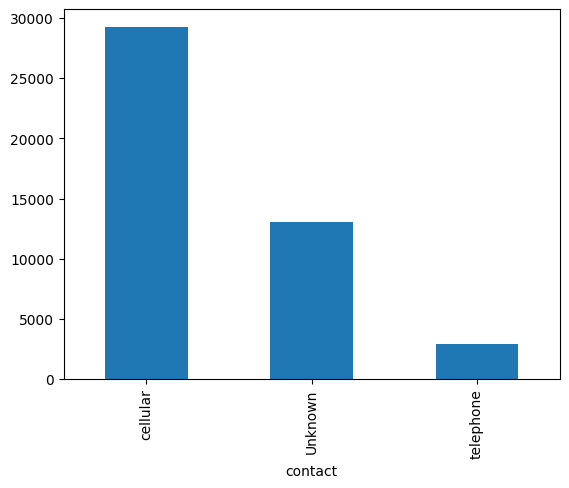

In [27]:
users_data_final.contact.value_counts().plot(kind='bar');

In [28]:
# check what else needs handling or dropping
missing_df = identify_missing_data(users_data_final)
missing_df

,variable_name,percent_missing,data_type
0,total_amount_usd,22.11,float64
1,number_transactions,22.11,float64
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object


In [29]:
users_data_final.total_amount_usd.fillna(0, inplace=True)

/var/folders/gs/c69h38_15hb4fnkpnc9gvksm0000gn/T/ipykernel_13005/4114173601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_data_final.total_amount_usd.fillna(0, inplace=True)


In [30]:
# DO NOT COPY THIS CODE UNLESS YOU ARE VERY INTERESTED
# advanced - code to replace all numerical variables with missing values with 0

numerical_cols = list(missing_df[(missing_df.data_type == 'float64') | (missing_df.data_type == "int64")].variable_name)

for n in numerical_cols:
    print(n)
    users_data_final[n].fillna(0, inplace=True)

total_amount_usd
number_transactions


/var/folders/gs/c69h38_15hb4fnkpnc9gvksm0000gn/T/ipykernel_13005/629153150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_data_final[n].fillna(0, inplace=True)


In [31]:
# check what else needs handling or dropping
missing_df = identify_missing_data(users_data_final)
missing_df

,variable_name,percent_missing,data_type
0,education,4.11,object
1,job,0.64,object
2,device,0.21,object


In [32]:
# try for yourself, how to handle the missing values in education
users_data_final.education.value_counts()

education
secondary    23184
tertiary     13292
primary       6847
Name: count, dtype: int64

In [33]:
# if you include dropna = False, this will
users_data_final.education.value_counts(dropna=False)

education
secondary    23184
tertiary     13292
primary       6847
None          1856
Name: count, dtype: int64

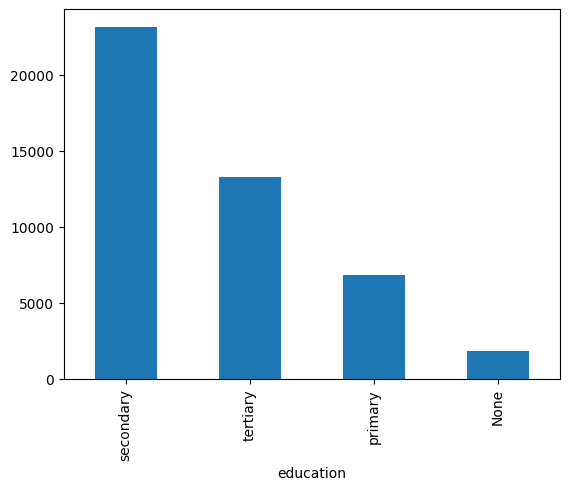

In [34]:
users_data_final.education.value_counts(dropna=False).plot(kind='bar');

## Load the "transformed" Data Frame to your local data folder

In [35]:
# load the data frame to your local data folder

users_data_final.to_pickle("../data/sh_users_data_final.pkl")

In [36]:
# extract the data to check

check = pd.read_pickle("../data/sh_users_data_final.pkl")
check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45179 entries, 0 to 45215
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45179 non-null  object        
 1   number_transactions  45179 non-null  float64       
 2   total_amount_usd     45179 non-null  float64       
 3   age                  45179 non-null  int64         
 4   job                  44891 non-null  object        
 5   marital              45179 non-null  object        
 6   education            43323 non-null  object        
 7   default              45179 non-null  bool          
 8   housing              45179 non-null  bool          
 9   loan                 45179 non-null  bool          
 10  contact              45179 non-null  object        
 11  duration             45179 non-null  int64         
 12  campaign             45179 non-null  int64         
 13  pdays                45179 non-null 

In [37]:
check.shape

(45179, 18)

## Load the "transformed" Data Frame to your s3 bucket

In [41]:
AWS_ACCESS_KEY_ID = "..."
AWS_SECRET_ACCESS_KEY = ".."
AWS_S3_BUCKET = 'july-bootcamp'


In [42]:
# i am using definitions to do this step, which i will introduce y'all to. Feel free to use the slides.

import boto3
from io import StringIO

def connect_to_s3(aws_access_key_id, aws_secret_access_key):
    """Methods that connects to s3"""

    s3_client = boto3.client(
        "s3",
        aws_access_key_id=aws_access_key_id,
        aws_secret_access_key=aws_secret_access_key
    )

    print("Connection to s3 made")
    
    return s3_client


def df_to_s3(df, key, s3_bucket, aws_access_key_id, aws_secret_access_key):
    """Function that writes a data frame as a .csv file to a s3 bucket"""

    csv_buffer = StringIO()  # create buffer to temporarily store the Data Frame

    df.to_csv(csv_buffer, index=False)  # code to write the data frame as csv file

    s3_client = connect_to_s3(aws_access_key_id, aws_secret_access_key)

    s3_client.put_object(
        Bucket=s3_bucket, Key=key, Body=csv_buffer.getvalue()
    )  # this code writes the temp stored csv file and writes to s3

    print(f"The transformed data is saved as CSV in the following location s3://{s3_bucket}/{key}")

In [43]:
connect_to_s3(AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY)

Connection to s3 made


In [45]:
key = "transformations_test/sh_users_data_final.csv"

df_to_s3(users_data_final, key, AWS_S3_BUCKET, AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY)

Connection to s3 made
The transformed data is saved as CSV in the following location s3://july-bootcamp/transformations_test/sh_users_data_final.csv


In [46]:
# make your connection to s3

import boto3

s3_client = boto3.client(
    "s3",
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)

In [47]:
s3_client

In [49]:
# read a file from s3

key = "transformations/fqa_users_data_final.csv" # specify the file name

response = s3_client.get_object(Bucket=AWS_S3_BUCKET, Key=key)
frances_file = pd.read_csv(response.get("Body"))



In [50]:
frances_file.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,Unknown,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,0.0,44,technician,single,secondary,False,True,False,Unknown,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,Unknown,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,0.0,47,blue-collar,married,NaN,False,True,False,Unknown,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,NaN,single,NaN,False,False,False,Unknown,198,1,-1,0,False,1995-08-01,mobile


In [51]:
frances_file.shape

(45179, 18)

In [52]:
frances_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45179 entries, 0 to 45178
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   age                  45179 non-null  int64  
 4   job                  44891 non-null  object 
 5   marital              45179 non-null  object 
 6   education            43323 non-null  object 
 7   default              45179 non-null  bool   
 8   housing              45179 non-null  bool   
 9   loan                 45179 non-null  bool   
 10  contact              45179 non-null  object 
 11  duration             45179 non-null  int64  
 12  campaign             45179 non-null  int64  
 13  pdays                45179 non-null  int64  
 14  previous             45179 non-null  int64  
 15  term_deposit         45179 non-null 